Import Libraries

In [249]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

Read Data

In [250]:
stock_Xiaomi = pd.read_csv('../Dataset/Xiaomi_clean.csv')
stock_Xiaomi

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-07-09,16.600000,17.000000,16.000000,16.799999,16.799999,462182642
1,2018-07-10,17.000000,19.340000,17.000000,19.000000,19.000000,534072218
2,2018-07-11,18.500000,19.799999,18.299999,19.000000,19.000000,374721138
3,2018-07-12,19.400000,19.700001,19.020000,19.260000,19.260000,132592630
4,2018-07-13,19.600000,21.799999,19.520000,21.450001,21.450001,364065075
...,...,...,...,...,...,...,...
1795,2025-10-22,46.000000,46.740002,45.700001,46.340000,46.340000,121391262
1796,2025-10-23,46.020000,47.080002,45.700001,46.740002,46.740002,106829656
1797,2025-10-24,47.099998,47.400002,45.740002,45.919998,45.919998,170946122
1798,2025-10-27,45.720001,46.000000,43.880001,45.799999,45.799999,282836746


Analyse

Describe

In [251]:
stock_Xiaomi.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1.800000e+03
mean,19.852772,20.228789,19.443633,19.835378,19.835378,1.318596e+08
std,12.583531,12.800973,12.310537,12.566569,12.566569,1.137286e+08
min,8.400000,8.440000,8.280000,8.350000,8.350000,0.000000e+00
25%,11.595000,11.820000,11.380000,11.620000,11.620000,6.578273e+07
50%,14.900000,15.140000,14.590000,14.830000,14.830000,1.007205e+08
75%,24.412500,25.000000,23.662500,24.375000,24.375000,1.584609e+08
max,61.450001,61.450001,59.599998,60.150002,60.150002,1.575804e+09


In [252]:
CV = stock_Xiaomi['Close'].std() / stock_Xiaomi['Close'].mean()
print("Coefficient of Variation: ", CV)


Coefficient of Variation:  0.6335431966112327


In [253]:
# Skewness
skewness = stats.skew(stock_Xiaomi['Close'])
print("Skewness: ", skewness)

Skewness:  1.7092474390260897


In [254]:
# Kurtosis
kurtosis = stats.kurtosis(stock_Xiaomi['Close'])
print("Kurtosis: ", kurtosis)

Kurtosis:  2.0801247163138505



Visualization

Histogram

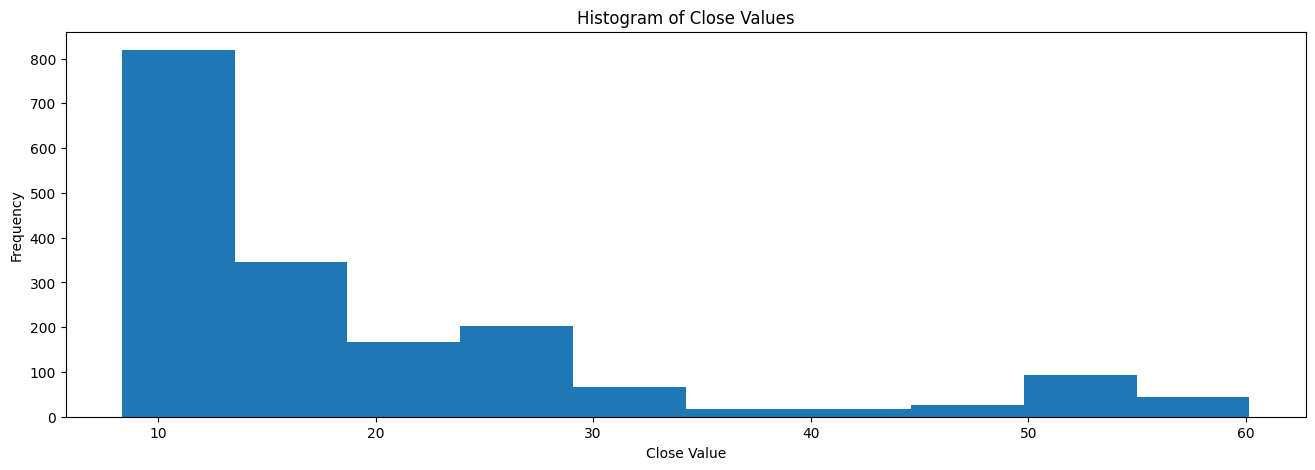

In [255]:
plt.figure(figsize=(16,5))
plt.hist(stock_Xiaomi['Close'])

plt.title("Histogram of Close Values")
plt.xlabel("Close Value")
plt.ylabel("Frequency")

plt.show()

Boxplot

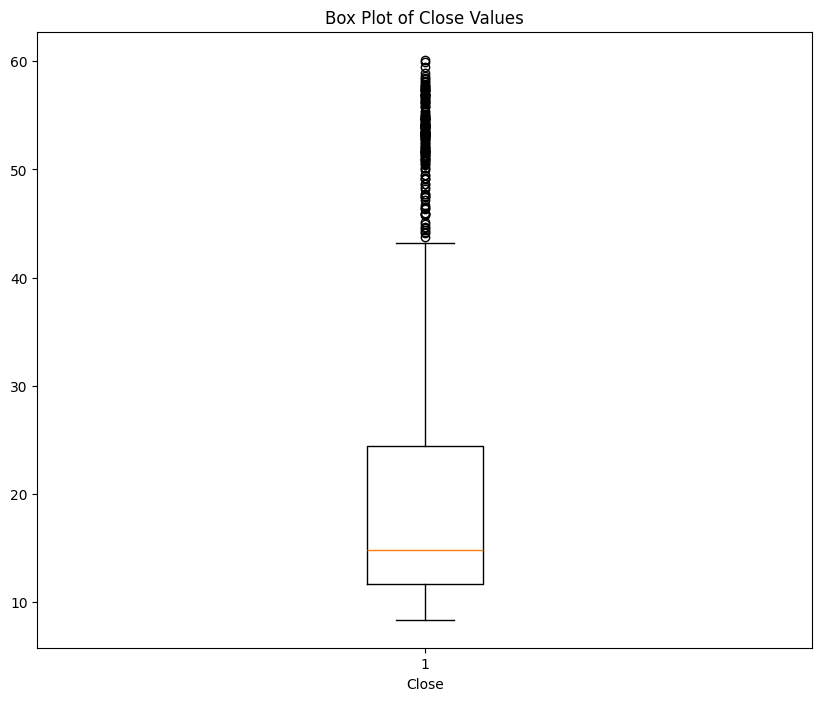

In [256]:
plt.figure(figsize=(10,8))
plt.boxplot(stock_Xiaomi['Close'])
plt.title("Box Plot of Close Values")
plt.xlabel("Close")
plt.show()

Visualizing the components of our time series: Trend, Seasonality, and Noise

In [257]:
# Convert the 'Date' column to datetime format
stock_Xiaomi['Date'] = pd.to_datetime(stock_Xiaomi['Date'])

# Set the 'Date' column as the index value
stock_Xiaomi = stock_Xiaomi.set_index(pd.DatetimeIndex(stock_Xiaomi['Date'].values))

# Delete Date from Dataframe
stock_Xiaomi = stock_Xiaomi.drop('Date', axis=1)

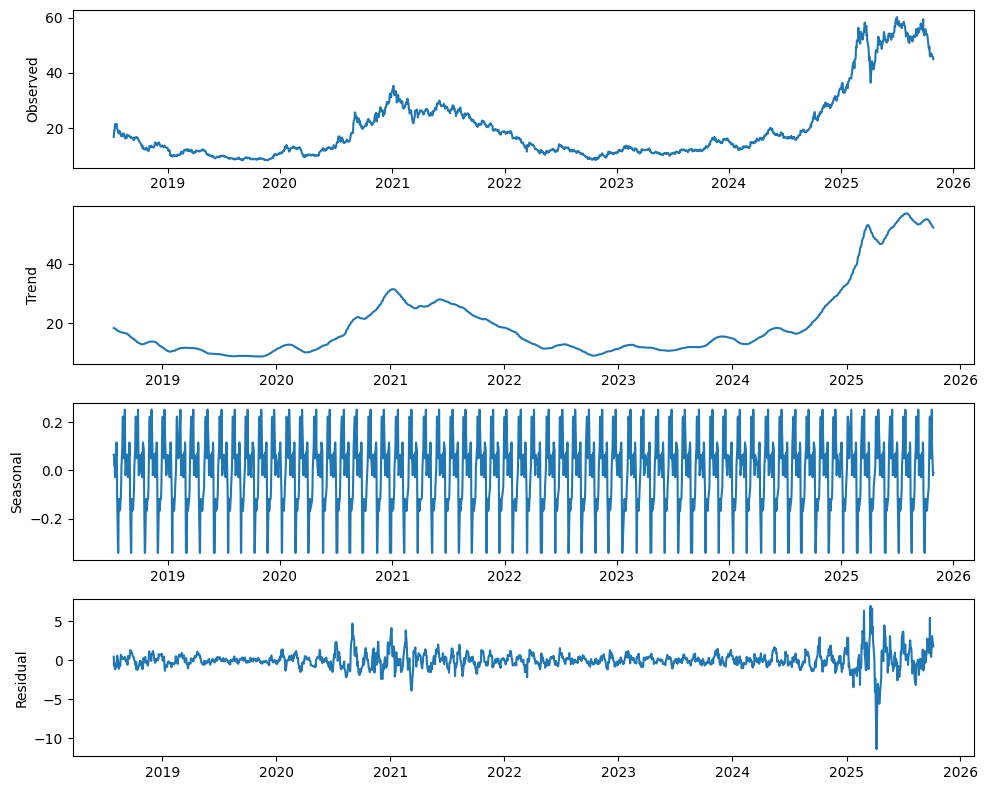

In [258]:
decomposition = sm.tsa.seasonal_decompose(stock_Xiaomi['Close'], model='add', period=30)

# Plotting the components
fig, ax = plt.subplots(4,1, figsize=(10,8))
ax[0].plot(decomposition.observed)
ax[0].set_ylabel('Observed')
ax[1].plot(decomposition.trend)
ax[1].set_ylabel('Trend')
ax[2].plot(decomposition.seasonal)
ax[2].set_ylabel('Seasonal')
ax[3].plot(decomposition.resid)
ax[3].set_ylabel('Residual')
plt.tight_layout()
plt.show()

Initial Close Values

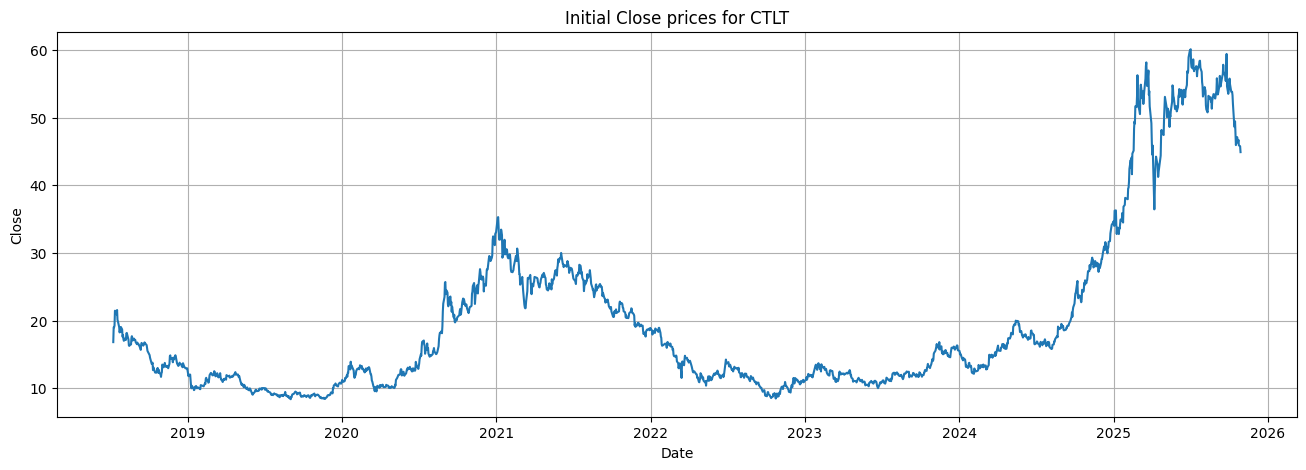

In [259]:
plt.figure(figsize=(16,5))

plt.plot(stock_Xiaomi.index, stock_Xiaomi['Close'])

plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Initial Close prices for CTLT')
plt.grid()
plt.show()